<a href="https://colab.research.google.com/github/atheostheos/ML_2023/blob/main/07_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выполнение задания

## 1

1. Построить модель линейной регрессии для данных из файла data.csv

https://drive.google.com/file/d/1MK4yFiHcsKST5sDkfpFCPDrgyVp_eCQu/view?usp=sharing

Найти коэффициенты регрессии и построить график.



In [1]:
!gdown 1MK4yFiHcsKST5sDkfpFCPDrgyVp_eCQu

Downloading...
From: https://drive.google.com/uc?id=1MK4yFiHcsKST5sDkfpFCPDrgyVp_eCQu
To: /content/data.csv
100% 281/281 [00:00<00:00, 908kB/s]


In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
X = np.reshape(data["km"].to_numpy(), (-1, 1))
y = data["price"].to_numpy()

0.7329747078314965
8499.599649933216 [-0.02144896]
[8499.58892545]
[8499.59964993 3137.35875201]


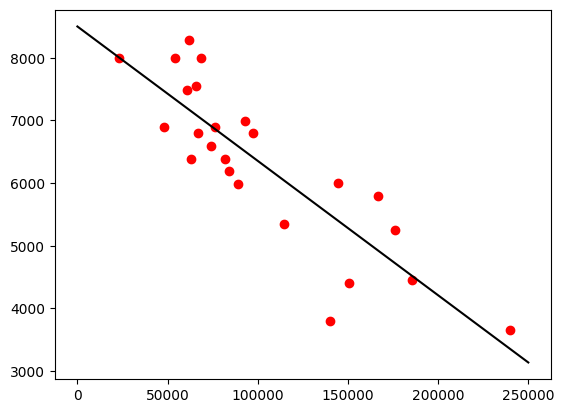

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.intercept_, reg.coef_)
print(reg.predict(np.array([[.5]])))

X_test = np.array([0, 250000])
y_test = reg.intercept_ + reg.coef_[0]*X_test

print(y_test)

plt.figure()
plt.scatter(X, y, c='red')
plt.plot(X_test, y_test, c='black')
plt.show()

## 2

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Выведите в графическом виде все примеры, где лучший классификатор ошибся.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

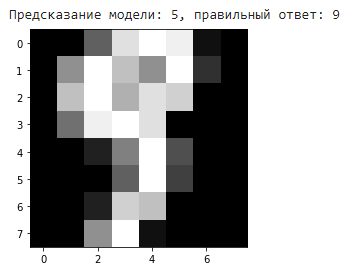

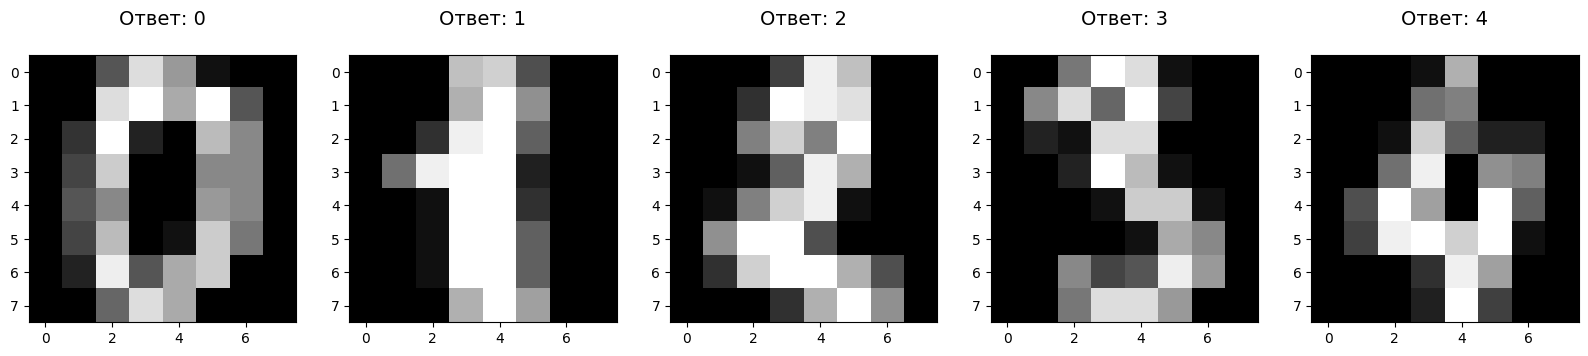

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Ответ: %i\n' % label, fontsize = 14)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

knn_model = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train, y_train)
knn_acc = accuracy_score(knn_model.predict(X_test), y_test)

dec_tree_model = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)
dec_tree_acc = accuracy_score(dtc_model.predict(X_test), y_test)

random_tree_model = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_train,y_train)
random_tree_acc = accuracy_score(random_tree_model.predict(X_test), y_test)

svc_model = SVC(kernel='linear', C=1, gamma=.000001).fit(X_train,y_train)
svc_acc = accuracy_score(svc_model.predict(X_test), y_test)

reg_model = LogisticRegression(random_state=1).fit(X_train,y_train)
reg_acc = accuracy_score(reg_model.predict(X_test), y_test)

bayes_model = GaussianNB().fit(X_train,y_train)
bayes_acc = accuracy_score(bayes_model.predict(X_test), y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print('KNeighborsClassifier: ', knn_acc)
print('DecisionTreeClassifier: ', dec_tree_acc)
print('RandomForestClassifier: ', random_tree_acc)
print('SVM: ', svc_acc)
print('LogisticRegression: ', reg_acc)
print('MultinomialNB: ', bayes_acc)

KNeighborsClassifier:  0.9962962962962963
DecisionTreeClassifier:  0.8814814814814815
RandomForestClassifier:  0.9777777777777777
SVM:  0.9740740740740741
LogisticRegression:  0.9703703703703703
MultinomialNB:  0.8555555555555555


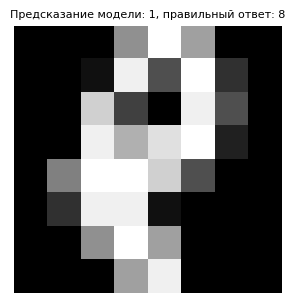

In [26]:
y_pred = knn_model.predict(X_test)
false_predictions = X_test[y_pred != y_test]

plt.figure(figsize=(20,4))
for i, image in enumerate(false_predictions):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Предсказание модели: {y_pred[y_pred != y_test][i]}, правильный ответ: {y_test[y_pred != y_test][i]}', fontsize=8)
    plt.axis('off')
plt.show()

## 3

1. Подумайте, как с помощью кластеризации и классификации определить число на картинке:

image.png

In [32]:
import io, base64
from PIL import Image

# Assuming base64_str is the string value without 'data:image/jpeg;base64,'
img = Image.open(io.BytesIO(base64.decodebytes(bytes("iVBORw0KGgoAAAANSUhEUgAAABsAAAAUCAYAAAB8gkaAAAABT0lEQVRIie2UTyiDcRjHvy+rxWE5KOR10S6SKEcuclNOI7mtHOay2kEoh9UOK23RLtpFrVYrNAcHtYvmZHHRylGRi39JkmXFx4EceN+9Cy3KU0/96vn2fJ7v7/n1MyShGkVdrUD/sH/Yd2FuAYJ9y2rn4ITu4E2DUv5+RyB2Gd6BrY003Oct68NTEYbM13NdXwgAX6t9P3tYdwjIIc8YUKjU4D2PgPmBL8AugJF6od5gdbCWcQCaK2gsdza6fCgj7df2k6Tyo6Sy4y6K5+vKBrp07aD7MEEHAKvhGWKxReKZXeCSeCKKaTPxZgkestOO7i2cPSuaWNJtkymX4WhImSs0UlhQoy/pqDXk9Ov3BEXRL8P4/KwDmTMlJ9s1F5xVi9eU292gk3xK8bU9y1Yux3FuDpSKlCxLx7kVLZ561OY1VcUlVOHsB+M3fVd/GPYCVR7Z9bn+APIAAAAASUVORK5CYII=", "utf-8"))))
img

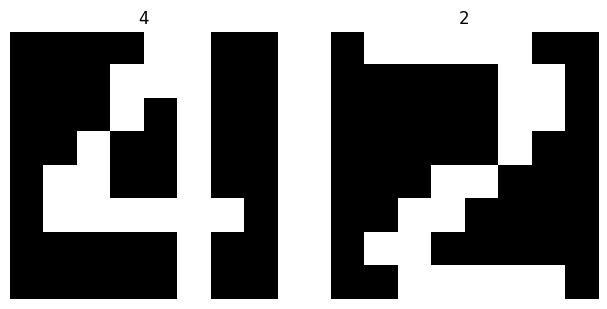

In [63]:
import cv2

im = np.asarray(img.convert("L"), dtype=np.uint8)

# find separate white blobs in image
contours, _ = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.figure(figsize=(20,4))
# process each found blob and classify number type
for i, contour in enumerate(reversed(contours)):
    x, y, w, h = cv2.boundingRect(contour)
    roi = im[y:y+h, x:x+w]
    roi_resized = cv2.resize(roi, (8, 8))
    _, roi_resized = cv2.threshold(roi_resized, 127, 255, cv2.THRESH_BINARY)
    roi_reshaped = roi_resized.reshape(1, -1)
    pred = knn_model.predict(roi_reshaped)

    plt.subplot(1, 5, i + 1)
    plt.imshow(roi_resized, cmap=plt.cm.gray)
    plt.title(pred[0])
    plt.axis('off')
plt.show()